In [28]:
%pylab inline
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
import clustering as cl
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [29]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk', rc={ 'lines.linewidth': 6}, font_scale=1.5)

In [30]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [31]:
X.shape

(1431, 46)

In [32]:
Y.shape

(1431,)

In [33]:
pd.Series(Y).value_counts()

3.0    654
1.0    432
2.0    345
dtype: int64

In [34]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [35]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [   0    3    6 ... 1427 1428 1429] TEST: [   1    2    4    5    8    9   14   18   19   27   29   31   34   39
   40   44   45   47   49   52   53   54   55   56   58   61   75   77
   80   85   92  108  124  140  141  142  148  152  156  159  161  175
  182  184  186  192  194  198  202  204  211  215  224  227  231  233
  240  241  247  251  253  254  260  268  270  278  279  295  298  299
  300  302  303  308  310  312  315  317  319  322  326  330  333  342
  353  361  362  376  390  393  399  406  408  411  422  425  427  432
  436  438  440  445  446  452  458  459  461  465  466  467  471  472
  473  477  479  487  489  491  494  500  506  511  513  517  520  526
  530  535  536  539  540  542  548  549  553  557  563  565  568  574
  579  580  581  587  589  597  608  609  610  613  615  618  619  634
  638  642  648  649  651  655  656  657  665  666  672  674  682  703
  704  711  712  716  717  726  731  733  737  740  742  748  759  764
  771  781  783  785  787  7

## XGBoost

In [36]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 0.2,
                      max_depth=5, 
                      gamma=5,
                      seed=82)

In [37]:
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

In [38]:
y_pred.shape

(357,)

In [39]:
pd.Series(y_pred).value_counts()

3.0    238
1.0    106
2.0     13
dtype: int64

## LogisticRegression

In [40]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [41]:
pd.Series(LR_y_pred).value_counts()

3.0    222
1.0    114
2.0     21
dtype: int64

## Comparassion

In [42]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 70.76%
XGB Accuracy: 62.75%
LR train Accuracy: 70.95%
LR Accuracy: 69.19%


In [43]:
features_names = list(X_with_columns.columns)

In [44]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: AVGHTGDIFF                          4.4%
Feature Importance: AVGATGDIFF                          4.34%
Feature Importance: home_ppg                            3.62%
Feature Importance: away_ppg                            3.5%
Feature Importance: odds_ft_away_team_win               3.36%
Feature Importance: awt_3                               3.24%
Feature Importance: odds_ft_home_team_win               2.8%
Feature Importance: A_AVGATGDIFF_1                      2.74%
Feature Importance: H_AVGHTGDIFF_1                      2.72%
Feature Importance: awt_4                               2.69%
Feature Importance: ht_3                                2.67%
Feature Importance: attendance                          2.66%
Feature Importance: ht_4                                2.44%
Feature Importance: A_result_1                          2.35%
Feature Importance: A_ATGDIFF_1                         2.31%
Feature Importance: H_HTGDIFF_1                         2.27%
Feature Imp

In [45]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['odds_ft_over35',
 'over_25_percentage_pre_match',
 'odds_btts_no',
 'odds_ft_over15',
 'odds_ft_over45']

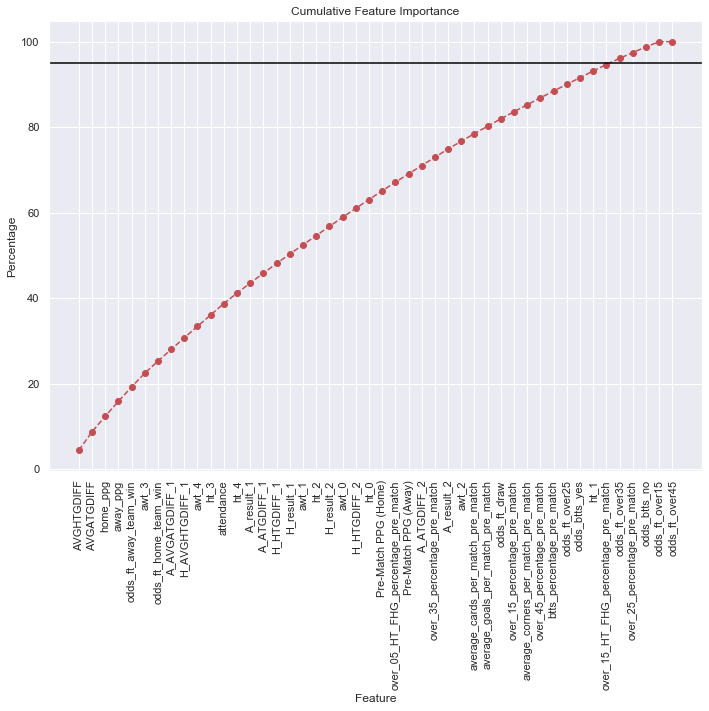

In [46]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

## Predict Result for Next Games

In [47]:
z_pred = XGB_model.predict(Z)

In [48]:
xgb_df_next_games = df_next_games.copy()

In [49]:
xgb_df_next_games['predicted_result'] = z_pred

In [50]:
xgb_df_next_games

,home_team_name,away_team_name,predicted_result
1448,Borussia Dortmund,Schalke 04,3.0
1449,RB Leipzig,Freiburg,3.0
1450,Hoffenheim,Hertha BSC,1.0
1451,Augsburg,Wolfsburg,1.0
1452,Fortuna Düsseldorf,Paderborn,3.0
1453,Eintracht Frankfurt,Borussia M'gladbach,2.0
1454,Köln,Mainz 05,3.0
1455,Union Berlin,Bayern München,1.0
1456,Werder Bremen,Bayer Leverkusen,1.0


In [51]:
lr_z_pred = LR.predict(Z)

In [52]:
lr_df_next_games = df_next_games.copy()

In [53]:
lr_df_next_games['predicted_result'] = lr_z_pred

In [54]:
lr_df_next_games

,home_team_name,away_team_name,predicted_result
1448,Borussia Dortmund,Schalke 04,3.0
1449,RB Leipzig,Freiburg,3.0
1450,Hoffenheim,Hertha BSC,2.0
1451,Augsburg,Wolfsburg,2.0
1452,Fortuna Düsseldorf,Paderborn,2.0
1453,Eintracht Frankfurt,Borussia M'gladbach,3.0
1454,Köln,Mainz 05,3.0
1455,Union Berlin,Bayern München,2.0
1456,Werder Bremen,Bayer Leverkusen,1.0


## Save Results to sqlite3

In [65]:
import sqlite3
# Create your connection.
cnx = sqlite3.connect('data.db')

In [66]:
lr_df_next_games.to_sql(name='lr_df_next_games', con=cnx)

In [71]:
xgb_df_next_games.to_sql(name='xgb_df_next_games', con=cnx)

In [70]:
p2 = pd.read_sql('select * from lr_df_next_games', cnx)

In [72]:
p3 = pd.read_sql('select * from xgb_df_next_games', cnx)